# Classification de page Internet en utilisant le dataset de Nicholas Kushmerick

## Contexte

# Importation des données

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn")

print("Dix premières lignes du jeu d'entraînement")
data = pd.read_csv("data_train.csv", sep = "\t")
data.head()

Dix premières lignes du jeu d'entraînement


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1550,X1551,X1552,X1553,X1554,X1555,X1556,X1557,X1558,outcome
1,33.0,230.0,6.9696,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,59.0,460.0,7.7966,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
5,60.0,234.0,3.9000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [3]:
print(f"Le jeu d'entraînement contient {data.shape[0]} observations et {data.shape[1]} variables")

Le jeu d'entraînement contient 2459 observations et 1559 variables


Vérifions les types des variables

In [4]:
data.dtypes

X1         float64
X2         float64
X3         float64
X4         float64
X5           int64
            ...   
X1555        int64
X1556        int64
X1557        int64
X1558        int64
outcome     object
Length: 1559, dtype: object

Affichons les indicateurs statistiques des différentes variables.

In [5]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1549,X1550,X1551,X1552,X1553,X1554,X1555,X1556,X1557,X1558
count,1806.000000,1809.000000,1801.000000,2446.000000,2459.00000,2459.000000,2459.000000,2459.00000,2459.000000,2459.000000,...,2459.00000,2459.000000,2459.00000,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000
mean,64.223145,155.238806,3.822937,0.770237,0.00366,0.013013,0.005693,0.00366,0.005287,0.013013,...,0.00610,0.004880,0.00366,0.002033,0.003253,0.006913,0.013013,0.013013,0.011387,0.001220
std,55.242397,129.404394,5.583711,0.420766,0.06040,0.113355,0.075255,0.06040,0.072532,0.113355,...,0.07788,0.069701,0.06040,0.045056,0.056957,0.082876,0.113355,0.113355,0.106121,0.034914
min,2.000000,1.000000,0.001500,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,82.000000,1.043400,1.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,110.000000,2.086900,1.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,84.750000,184.000000,5.333300,1.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,640.000000,640.000000,60.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
print(f" Pourcentage de données dans la classe nonead. : {data[data['outcome']== 'nonad.'].shape[0] / data.shape[0] * 100:.2f}%")
print(f" Pourcentage de données dans la classe ad. : {data[data['outcome']== 'ad.'].shape[0] / data.shape[0] * 100:.2f}%")

 Pourcentage de données dans la classe nonead. : 85.56%
 Pourcentage de données dans la classe ad. : 14.44%


## Imputation des valeurs manquantes

Nous commençons par vérifier le taux de complétion des variables

In [7]:
rows = data.shape[0]

def test_completion(data):
    """
    Compute sorted completion rate for each variable of the argument in a descending order
    
    Args:
        data(dataset) : A dataset with variables
        
    Returns:
        A specific dataframe with completion rate for each variable. 
        Schema :
            Index : Variable names
            pourcentage d'observations : completion rate
    """
    var_dict = {}
    
    for col in data.columns:
        var_dict[col] = {}
        var_dict[col]['taux_completion'] = round(data[data[col].notna()==1].shape[0]/rows*100,2)
        var_dict[col]['valeurs_manquantes'] = data[data[col].isna()==1].shape[0]
        
    return pd.DataFrame.from_dict(data=var_dict, orient="index").sort_values(by="taux_completion", ascending=False)

print("Affichage du taux de complétion des 10 variables dont le taux est le plus faible.")
test_completion(data).tail(10)

Affichage du taux de complétion des 10 variables dont le taux est le plus faible.


,taux_completion,valeurs_manquantes
X520,100.00,0
X519,100.00,0
X518,100.00,0
X517,100.00,0
X516,100.00,0
X515,100.00,0
X4,99.47,13
X2,73.57,650
X1,73.44,653
X3,73.24,658


Seuls X1, X2, X3 ont des valeurs manquantes. Selon la synthèse des travaux de Nicholas Kushmerick:
- X1, X2, X3 indiquent que les dimensions des images sont présentes dans le code de la page
-  indique que l'image et le lien de redirection associés sont tous les deux sur la même page ou non

Ces données étant issues de l'encodage HTML réalisé par les responsables des sites internet dépend uniquement du fait qu'elles soient renseignées ou non par ces derniers. Nous sommes donc en présence d'un mécanisme MCAR. 

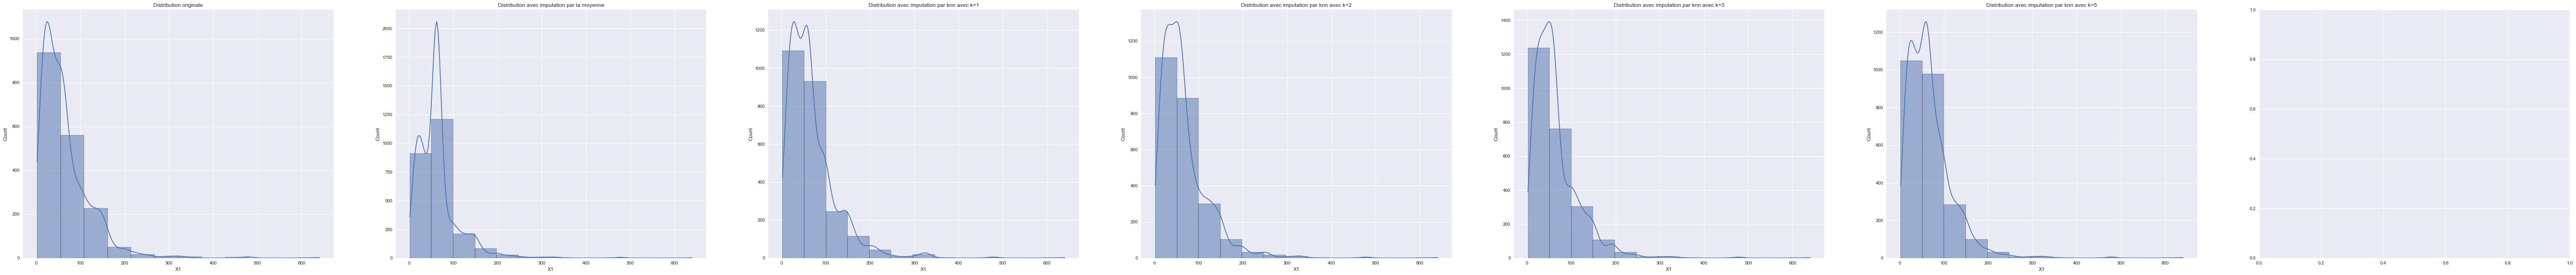

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

bins = "sturges"
data_copy = data.select_dtypes(['int','float']).copy()
simple_imputer = SimpleImputer(strategy="mean")
knn_imputer_1 = KNNImputer(weights="distance", n_neighbors=1,copy=False)
knn_imputer_2 = KNNImputer(weights="distance", n_neighbors=2,copy=False)
knn_imputer_3 =  KNNImputer(weights="distance", n_neighbors=3,copy=False)
knn_imputer_5 =  KNNImputer(weights="distance", n_neighbors=5,copy=False)
#iterative_imputer = IterativeImputer(max_iter=10, random_state=42)
 
simple_imputed = pd.DataFrame(np.round_(simple_imputer.fit_transform(data_copy)),columns=data_copy.columns, index=data_copy.index )
knn_imputed_1 = pd.DataFrame(np.round_(knn_imputer_1.fit_transform(data_copy)),columns=data_copy.columns, index=data_copy.index)
knn_imputed_2 = pd.DataFrame(np.round_(knn_imputer_2.fit_transform(data_copy)),columns=data_copy.columns, index=data_copy.index)
knn_imputed_3 = pd.DataFrame(np.round_(knn_imputer_3.fit_transform(data_copy)),columns=data_copy.columns, index=data_copy.index)
knn_imputed_5 = pd.DataFrame(np.round_(knn_imputer_5.fit_transform(data_copy)),columns=data_copy.columns, index=data_copy.index)
#iterative_imputed = pd.DataFrame(np.round_(iterative_imputer.fit_transform(data_copy)), columns=data_copy.columns, index=data_copy.index)

fig, axes = plt.subplots(ncols=7, figsize=(100,10))

#original distribution
sns.histplot(ax=axes[0], data=data, x="X1", bins=bins, kde=True)
axes[0].set_title("Distribution originale")

#Imputed with mean
sns.histplot(ax=axes[1], data=simple_imputed,  x="X1", bins=bins, kde=True)
axes[1].set_title("Distribution avec imputation par la moyenne")

#inputed with KNN with k=1
sns.histplot(ax=axes[2], data=knn_imputed_1,  x="X1", bins=bins, kde=True)
axes[2].set_title("Distribution avec imputation par knn avec k=1")

#inputed with KNN with k=2
sns.histplot(ax=axes[3], data=knn_imputed_2,  x="X1", bins=bins, kde=True)
axes[3].set_title("Distribution avec imputation par knn avec k=2")

#inputed with KNN with k=3
sns.histplot(ax=axes[4], data=knn_imputed_3,  x="X1", bins=bins, kde=True)
axes[4].set_title("Distribution avec imputation par knn avec k=3")

#inputed with KNN with k=5
sns.histplot(ax=axes[5], data=knn_imputed_5,  x="X1", bins=bins, kde=True)
axes[5].set_title("Distribution avec imputation par knn avec k=5")

#inputed with iterative imputer
#sns.histplot(ax=axes[6], data=iterative_imputed,  x="X1", bins=bins, kde=True)
#axes[6].set_title("Distribution avec imputation modèle iteratif")

plt.show()

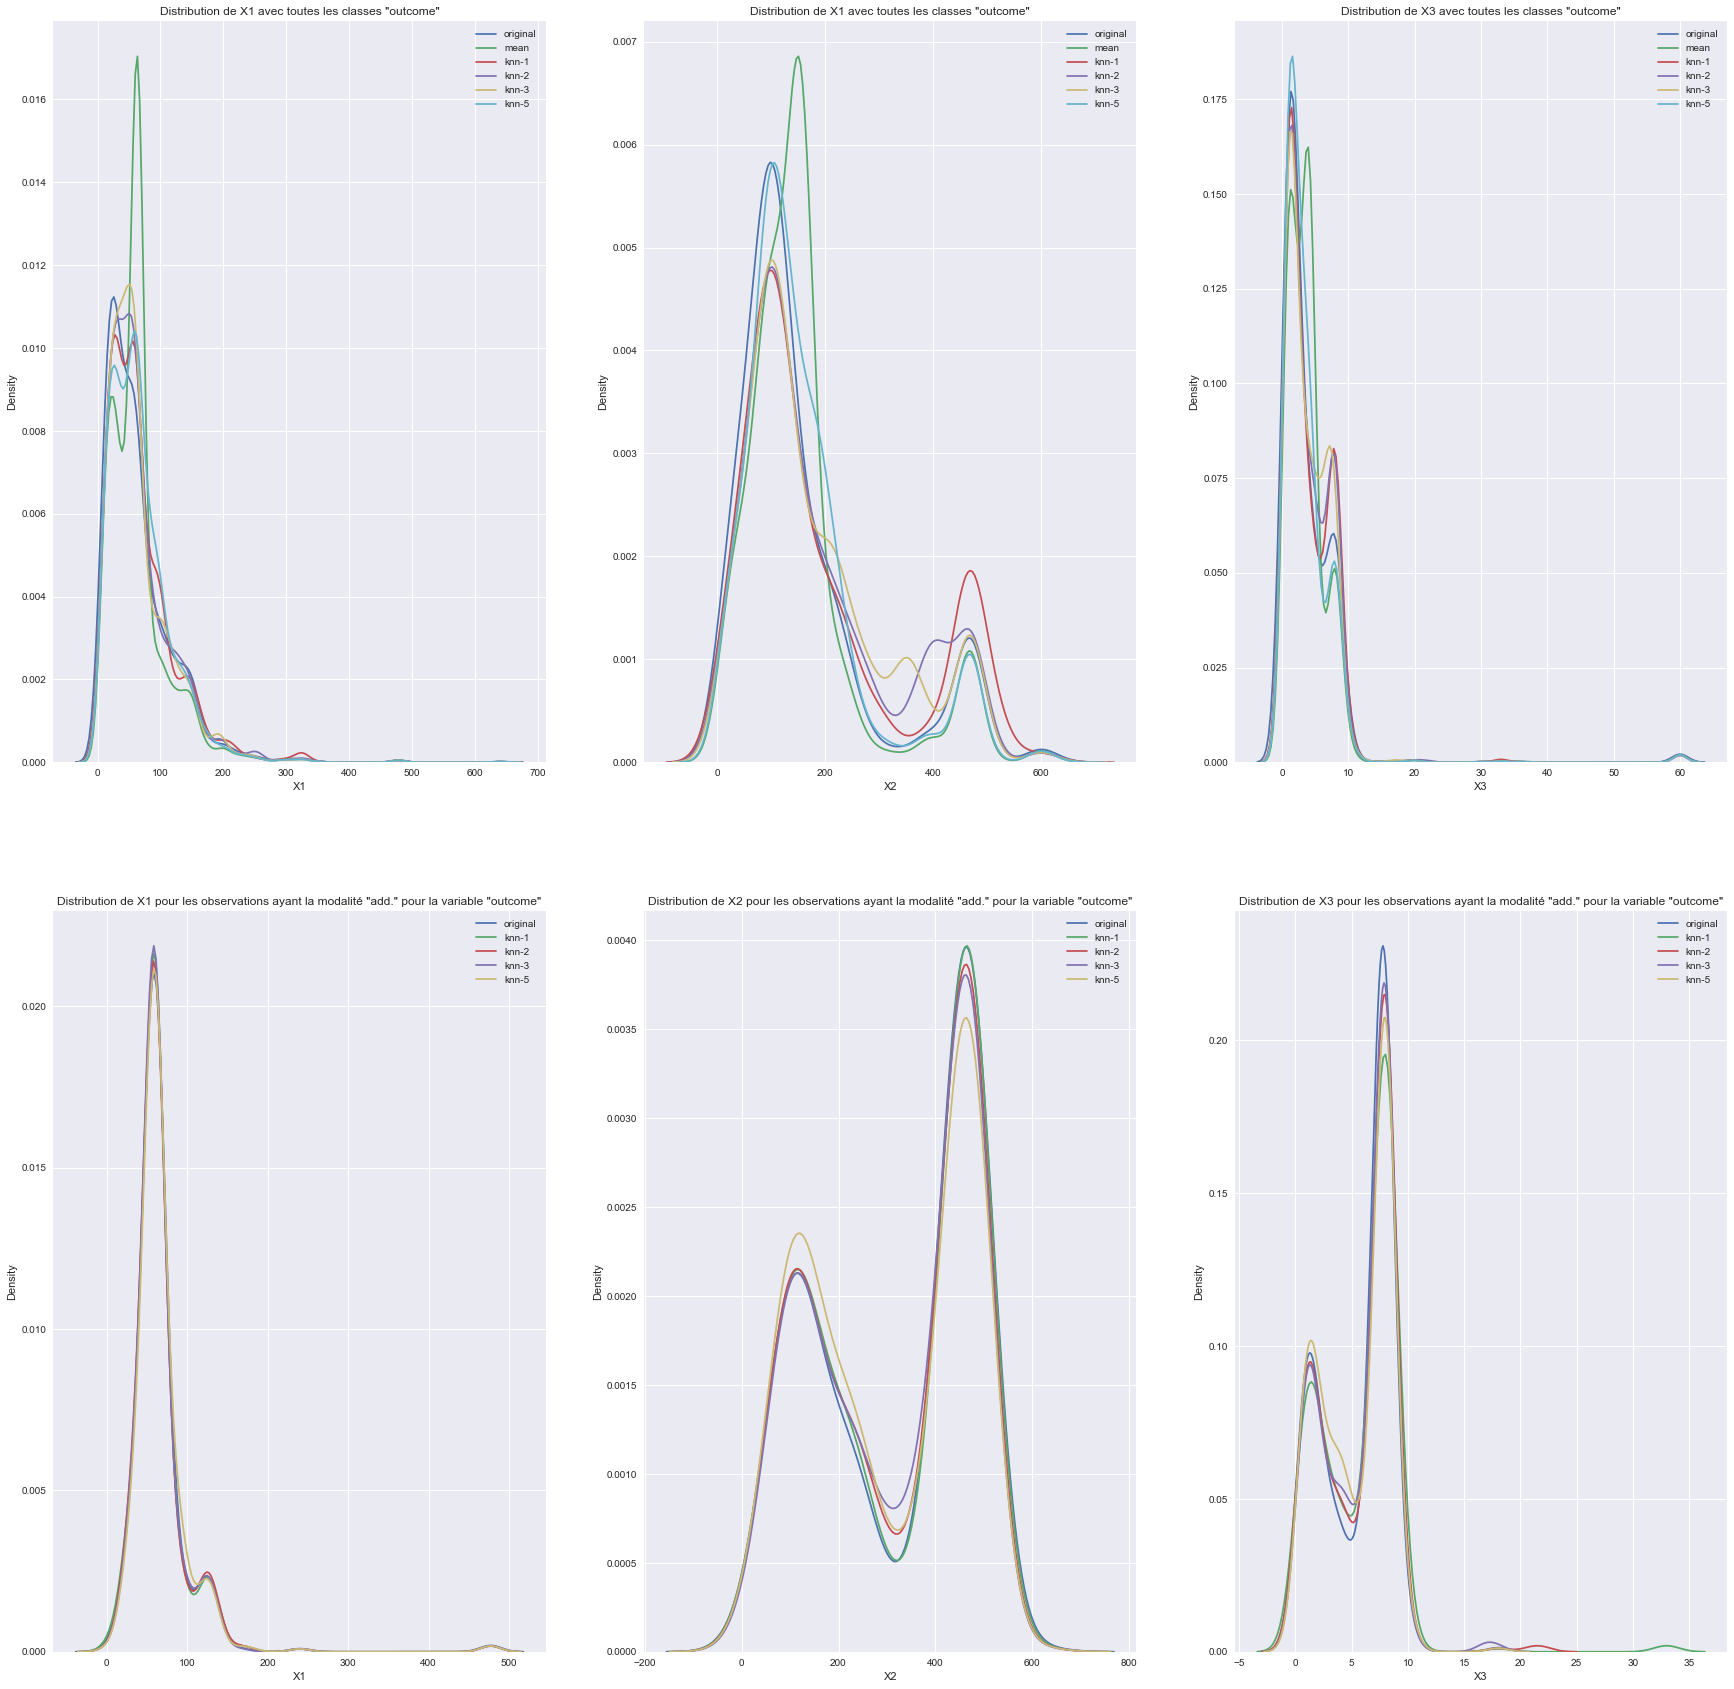

In [57]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(30,30))

sns.kdeplot(ax=axes[0,0], data=data, x="X1", label="original")
sns.kdeplot(ax=axes[0,0], data=simple_imputed, x="X1", label="mean")
sns.kdeplot(ax=axes[0,0], data=knn_imputed_1, x="X1", label="knn-1")
sns.kdeplot(ax=axes[0,0], data=knn_imputed_2, x="X1", label="knn-2")
sns.kdeplot(ax=axes[0,0], data=knn_imputed_3, x="X1", label="knn-3")
sns.kdeplot(ax=axes[0,0], data=knn_imputed_5, x="X1", label="knn-5")
axes[0,0].legend()
axes[0,0].set_title('Distribution de X1 avec toutes les classes "outcome"')


sns.kdeplot(ax=axes[0,1], data=data, x="X2", label="original")
sns.kdeplot(ax=axes[0,1], data=simple_imputed, x="X2", label="mean")
sns.kdeplot(ax=axes[0,1], data=knn_imputed_1, x="X2", label="knn-1")
sns.kdeplot(ax=axes[0,1], data=knn_imputed_2, x="X2", label="knn-2")
sns.kdeplot(ax=axes[0,1], data=knn_imputed_3, x="X2", label="knn-3")
sns.kdeplot(ax=axes[0,1], data=knn_imputed_5, x="X2", label="knn-5")
axes[0,1].legend()
axes[0,1].set_title('Distribution de X1 avec toutes les classes "outcome"')


sns.kdeplot(ax=axes[0,2], data=data, x="X3", label="original")
sns.kdeplot(ax=axes[0,2], data=simple_imputed, x="X3", label="mean")
sns.kdeplot(ax=axes[0,2], data=knn_imputed_1, x="X3", label="knn-1")
sns.kdeplot(ax=axes[0,2], data=knn_imputed_2, x="X3", label="knn-2")
sns.kdeplot(ax=axes[0,2], data=knn_imputed_3, x="X3", label="knn-3")
sns.kdeplot(ax=axes[0,2], data=knn_imputed_5, x="X3", label="knn-5")
axes[0,2].legend()
axes[0,2].set_title('Distribution de X3 avec toutes les classes "outcome"')


sns.kdeplot(ax=axes[1,0], data=data[data['outcome']== 'ad.'], x="X1", label="original")
sns.kdeplot(ax=axes[1,0], data=simple_imputed[simple_imputed['outcome']== 'nad.'], x="X1", label="mean")
sns.kdeplot(ax=axes[1,0], data=knn_imputed_1[knn_imputed_1['outcome']== 'ad.'], x="X1", label="knn-1")
sns.kdeplot(ax=axes[1,0], data=knn_imputed_2[knn_imputed_2['outcome']== 'ad.'], x="X1", label="knn-2")
sns.kdeplot(ax=axes[1,0], data=knn_imputed_3[knn_imputed_3['outcome']== 'ad.'], x="X1", label="knn-3")
sns.kdeplot(ax=axes[1,0], data=knn_imputed_5[knn_imputed_5['outcome']== 'ad.'], x="X1", label="knn-5")
axes[1,0].legend()
axes[1,0].set_title('Distribution de X1 pour les observations ayant la modalité "add." pour la variable "outcome"')

sns.kdeplot(ax=axes[1,1], data=data[data['outcome']== 'ad.'], x="X2", label="original")
sns.kdeplot(ax=axes[1,1], data=simple_imputed[simple_imputed['outcome']== 'nad.'], x="X2", label="mean")
sns.kdeplot(ax=axes[1,1], data=knn_imputed_1[knn_imputed_1['outcome']== 'ad.'], x="X2", label="knn-1")
sns.kdeplot(ax=axes[1,1], data=knn_imputed_2[knn_imputed_2['outcome']== 'ad.'], x="X2", label="knn-2")
sns.kdeplot(ax=axes[1,1], data=knn_imputed_3[knn_imputed_3['outcome']== 'ad.'], x="X2", label="knn-3")
sns.kdeplot(ax=axes[1,1], data=knn_imputed_5[knn_imputed_5['outcome']== 'ad.'], x="X2", label="knn-5")
axes[1,1].legend()
axes[1,1].set_title('Distribution de X2 pour les observations ayant la modalité "add." pour la variable "outcome"')

sns.kdeplot(ax=axes[1,2], data=data[data['outcome']== 'ad.'], x="X3", label="original")
sns.kdeplot(ax=axes[1,2], data=simple_imputed[simple_imputed['outcome']== 'nad.'], x="X3", label="mean")
sns.kdeplot(ax=axes[1,2], data=knn_imputed_1[knn_imputed_1['outcome']== 'ad.'], x="X3", label="knn-1")
sns.kdeplot(ax=axes[1,2], data=knn_imputed_2[knn_imputed_2['outcome']== 'ad.'], x="X3", label="knn-2")
sns.kdeplot(ax=axes[1,2], data=knn_imputed_3[knn_imputed_3['outcome']== 'ad.'], x="X3", label="knn-3")
sns.kdeplot(ax=axes[1,2], data=knn_imputed_5[knn_imputed_5['outcome']== 'ad.'], x="X3", label="knn-5")
axes[1,2].legend()
axes[1,2].set_title('Distribution de X3 pour les observations ayant la modalité "add." pour la variable "outcome"')


plt.show()

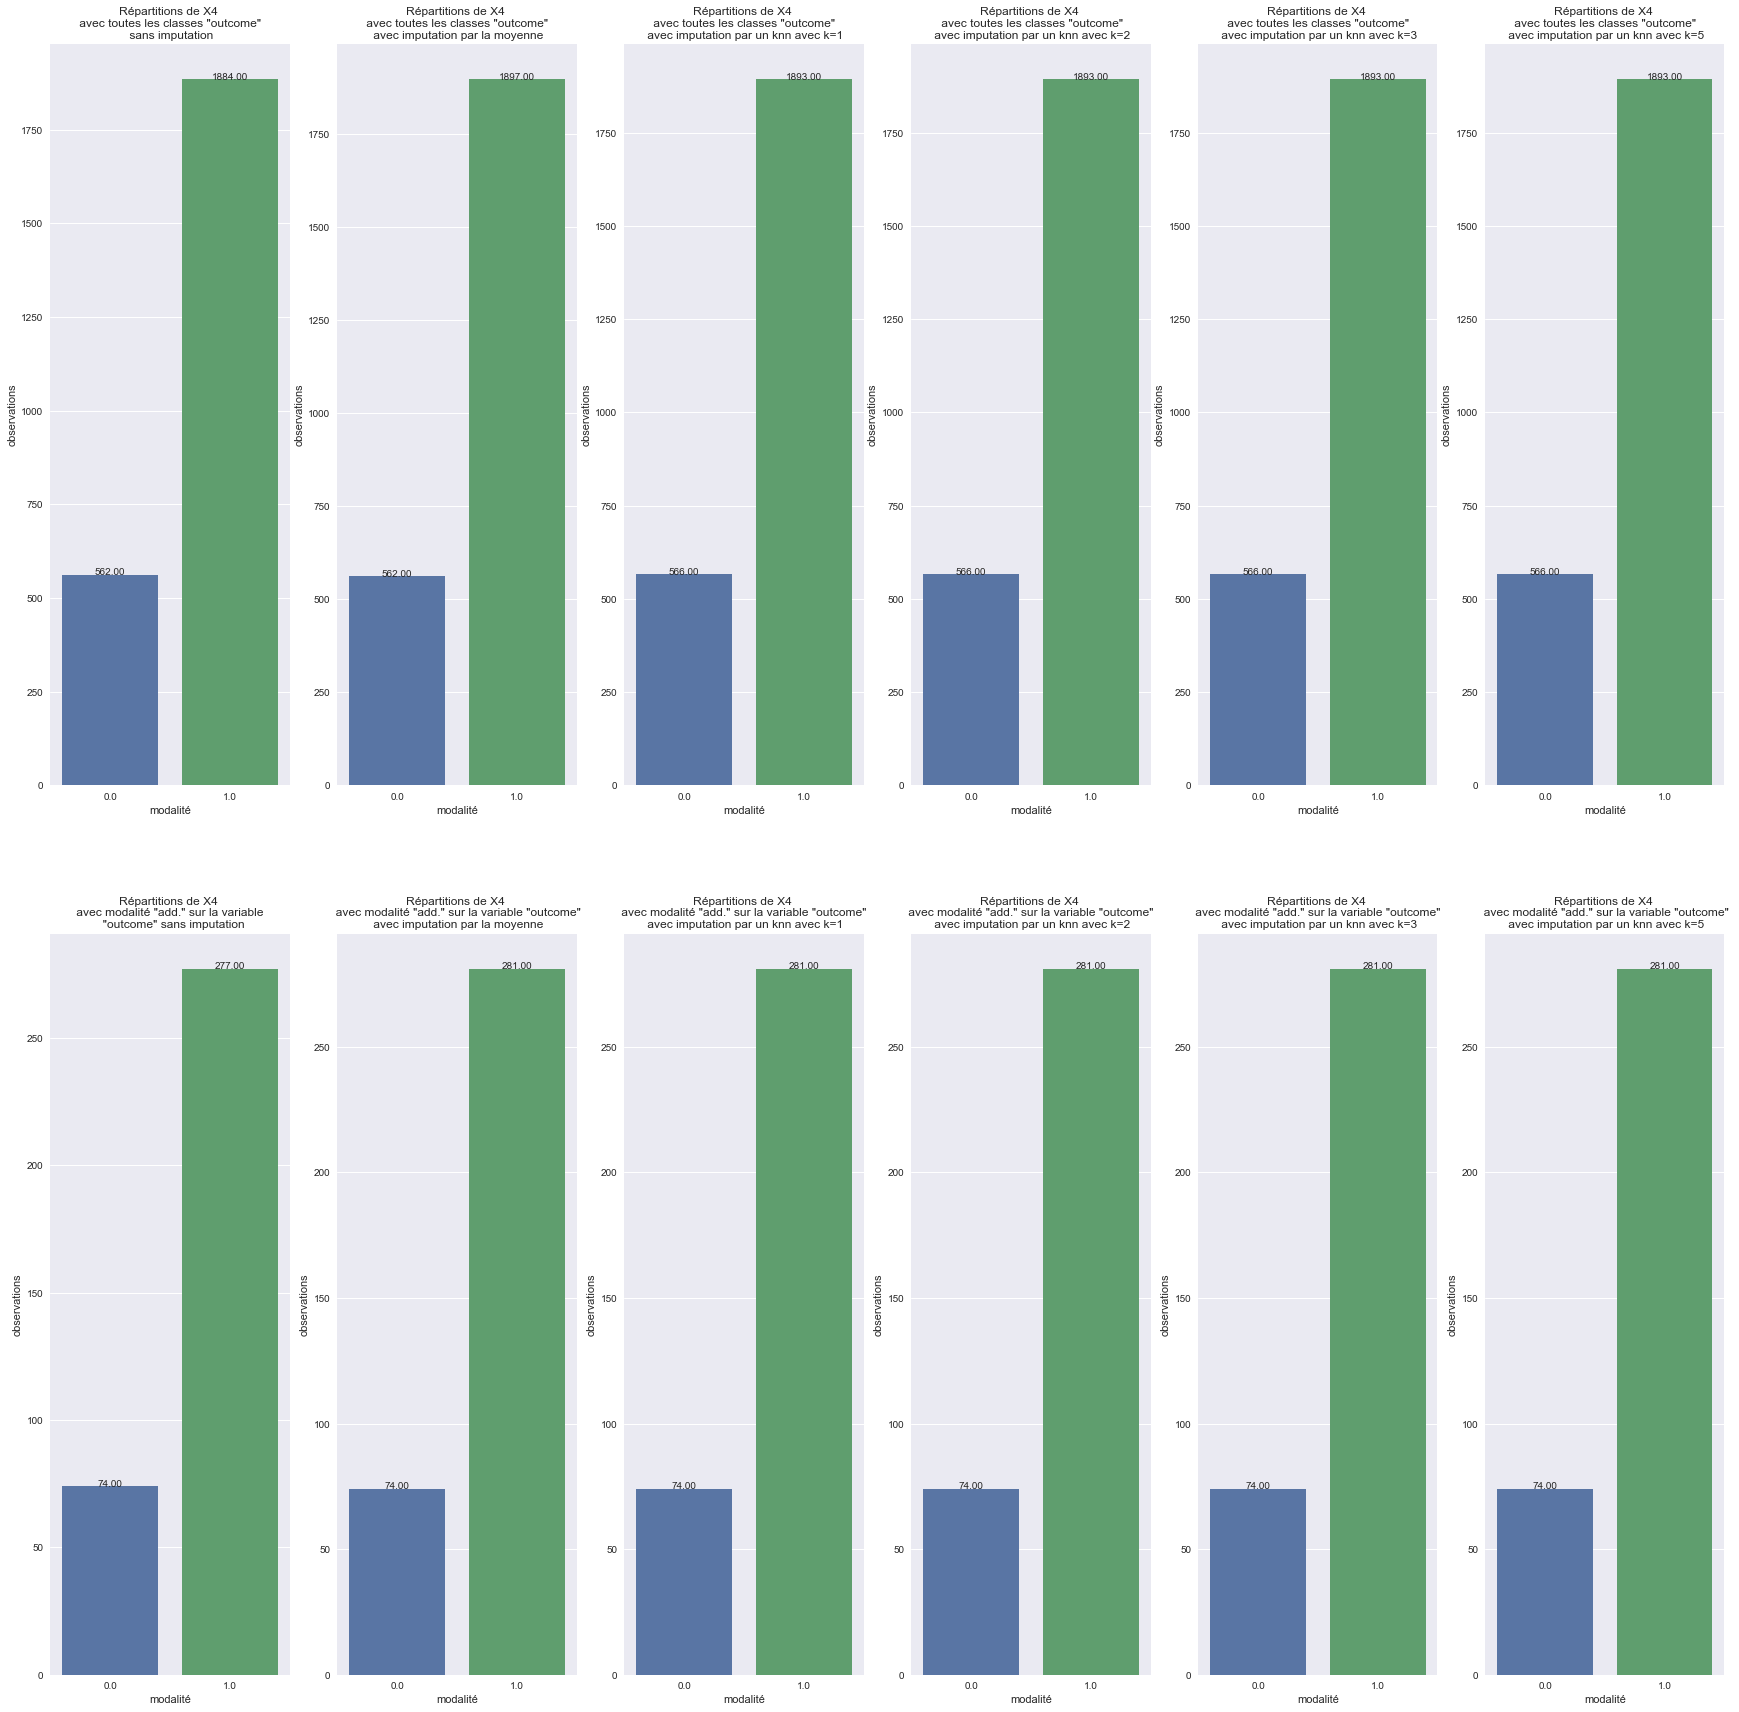

In [132]:
x4_by_outcome_original_all_outcome_x4 = pd.DataFrame(data.groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_original_all_outcome_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_original_all_outcome_x4.set_index('modalité', inplace=True)
x4_by_outcome_original_all_outcome_x4

x4_by_outcome_mean_all_outcome_x4 = pd.DataFrame(simple_imputed.groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_mean_all_outcome_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_mean_all_outcome_x4.set_index('modalité', inplace=True)
x4_by_outcome_mean_all_outcome_x4

x4_by_outcome_knn1_all_outcome_x4 = pd.DataFrame(knn_imputed_1.groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_knn1_all_outcome_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_knn1_all_outcome_x4.set_index('modalité', inplace=True)
x4_by_outcome_knn1_all_outcome_x4

x4_by_outcome_knn2_all_outcome_x4 = pd.DataFrame(knn_imputed_2.groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_knn2_all_outcome_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_knn2_all_outcome_x4.set_index('modalité', inplace=True)
x4_by_outcome_knn2_all_outcome_x4

x4_by_outcome_knn3_all_outcome_x4 = pd.DataFrame(knn_imputed_3.groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_knn3_all_outcome_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_knn3_all_outcome_x4.set_index('modalité', inplace=True)
x4_by_outcome_knn3_all_outcome_x4

x4_by_outcome_knn5_all_outcome_x4 = pd.DataFrame(knn_imputed_5.groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_knn5_all_outcome_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_knn5_all_outcome_x4.set_index('modalité', inplace=True)
x4_by_outcome_knn5_all_outcome_x4


x4_by_outcome_original_add_x4 = pd.DataFrame(data[data['outcome']=='ad.'].groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_original_add_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_original_add_x4.set_index('modalité', inplace=True)
x4_by_outcome_original_add_x4

x4_by_outcome_mean_add_x4 = pd.DataFrame(simple_imputed[simple_imputed['outcome']=='ad.'].groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_mean_add_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_mean_add_x4.set_index('modalité', inplace=True)
x4_by_outcome_mean_add_x4

x4_by_outcome_knn1_add_x4 = pd.DataFrame(knn_imputed_1[knn_imputed_1['outcome']=='ad.'].groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_knn1_add_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_knn1_add_x4.set_index('modalité', inplace=True)
x4_by_outcome_knn1_add_x4

x4_by_outcome_knn2_add_x4 = pd.DataFrame(knn_imputed_2[knn_imputed_2['outcome']=='ad.'].groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_knn2_add_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_knn2_add_x4.set_index('modalité', inplace=True)
x4_by_outcome_knn2_add_x4

x4_by_outcome_knn3_add_x4 = pd.DataFrame(knn_imputed_3[knn_imputed_3['outcome']=='ad.'].groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_knn3_add_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_knn3_add_x4.set_index('modalité', inplace=True)
x4_by_outcome_knn3_add_x4

x4_by_outcome_knn5_add_x4 = pd.DataFrame(knn_imputed_5[knn_imputed_5['outcome']=='ad.'].groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_knn5_add_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_knn5_add_x4.set_index('modalité', inplace=True)
x4_by_outcome_knn5_add_x4

fig, axes = plt.subplots(ncols=6, nrows=2, figsize=(30,30))
sns.barplot(ax=axes[0,0], data=x4_by_outcome_original_all_outcome_x4, x=x4_by_outcome_original_all_outcome_x4.index, y="observations")
for p in axes[0,0].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[0,0].text(_x, _y, value, ha="center")
axes[0,0].set_title('Répartitions de X4 \n avec toutes les classes "outcome" \n sans imputation')

sns.barplot(ax=axes[0,1], data=x4_by_outcome_mean_all_outcome_x4, x=x4_by_outcome_mean_all_outcome_x4.index, y="observations")
for p in axes[0,1].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[0,1].text(_x, _y, value, ha="center")
axes[0,1].set_title('Répartitions de X4 \n avec toutes les classes "outcome" \n avec imputation par la moyenne')

sns.barplot(ax=axes[0,2], data=x4_by_outcome_knn1_all_outcome_x4, x=x4_by_outcome_knn1_all_outcome_x4.index, y="observations")
for p in axes[0,2].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[0,2].text(_x, _y, value, ha="center")
axes[0,2].set_title('Répartitions de X4 \n avec toutes les classes "outcome" \n avec imputation par un knn avec k=1')

sns.barplot(ax=axes[0,3], data=x4_by_outcome_knn2_all_outcome_x4, x=x4_by_outcome_knn2_all_outcome_x4.index, y="observations")
for p in axes[0,3].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[0,3].text(_x, _y, value, ha="center")
axes[0,3].set_title('Répartitions de X4 \n avec toutes les classes "outcome"\n avec imputation par un knn avec k=2')

sns.barplot(ax=axes[0,4], data=x4_by_outcome_knn3_all_outcome_x4, x=x4_by_outcome_knn3_all_outcome_x4.index, y="observations")
for p in axes[0,4].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[0,4].text(_x, _y, value, ha="center")
axes[0,4].set_title('Répartitions de X4 \n avec toutes les classes "outcome" \n avec imputation par un knn avec k=3')

sns.barplot(ax=axes[0,5], data=x4_by_outcome_knn5_all_outcome_x4, x=x4_by_outcome_knn5_all_outcome_x4.index, y="observations")
for p in axes[0,5].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[0,5].text(_x, _y, value, ha="center")
axes[0,5].set_title('Répartitions de X4 \n avec toutes les classes "outcome" \n avec imputation par un knn avec k=5')

sns.barplot(ax=axes[1,0], data=x4_by_outcome_original_add_x4, x=x4_by_outcome_original_add_x4.index, y="observations")
for p in axes[1,0].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[1,0].text(_x, _y, value, ha="center")
axes[1,0].set_title('Répartitions de X4 \n avec modalité "add." sur la variable \n  "outcome" sans imputation')

sns.barplot(ax=axes[1,1], data=x4_by_outcome_mean_add_x4, x=x4_by_outcome_mean_add_x4.index, y="observations")
for p in axes[1,1].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[1,1].text(_x, _y, value, ha="center")
axes[1,1].set_title('Répartitions de X4 \n  avec modalité "add." sur la variable "outcome" \n avec imputation par la moyenne')

sns.barplot(ax=axes[1,2], data=x4_by_outcome_knn1_add_x4, x=x4_by_outcome_knn1_add_x4.index, y="observations")
for p in axes[1,2].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[1,2].text(_x, _y, value, ha="center")
axes[1,2].set_title('Répartitions de X4 \n avec modalité "add." sur la variable "outcome" \n avec imputation par un knn avec k=1')

sns.barplot(ax=axes[1,3], data=x4_by_outcome_knn2_add_x4, x=x4_by_outcome_knn2_add_x4.index, y="observations")
for p in axes[1,3].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[1,3].text(_x, _y, value, ha="center")
axes[1,3].set_title('Répartitions de X4 \n avec modalité "add." sur la variable "outcome" \n avec imputation par un knn avec k=2')

sns.barplot(ax=axes[1,4], data=x4_by_outcome_knn3_add_x4, x=x4_by_outcome_knn3_add_x4.index, y="observations")
for p in axes[1,4].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[1,4].text(_x, _y, value, ha="center")
axes[1,4].set_title('Répartitions de X4 \n avec modalité "add." sur la variable "outcome" \n avec imputation par un knn avec k=3')

sns.barplot(ax=axes[1,5], data=x4_by_outcome_knn5_add_x4, x=x4_by_outcome_knn5_add_x4.index, y="observations")
for p in axes[1,5].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[1,5].text(_x, _y, value, ha="center")
axes[1,5].set_title('Répartitions de X4 \n  avec modalité "add." sur la variable "outcome" \n avec imputation par un knn avec k=5')

plt.show()

In [118]:
x4_by_outcome_original_all_outcome_x4 = pd.DataFrame(data.groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_original_all_outcome_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_original_all_outcome_x4.set_index('modalité', inplace=True)
x4_by_outcome_original_all_outcome_x4

,observations
modalité,
0.0,562
1.0,1884


In [73]:
data["X4"].value_counts(dropna=False)

1.0    1884
0.0     562
NaN      13
Name: X4, dtype: int64

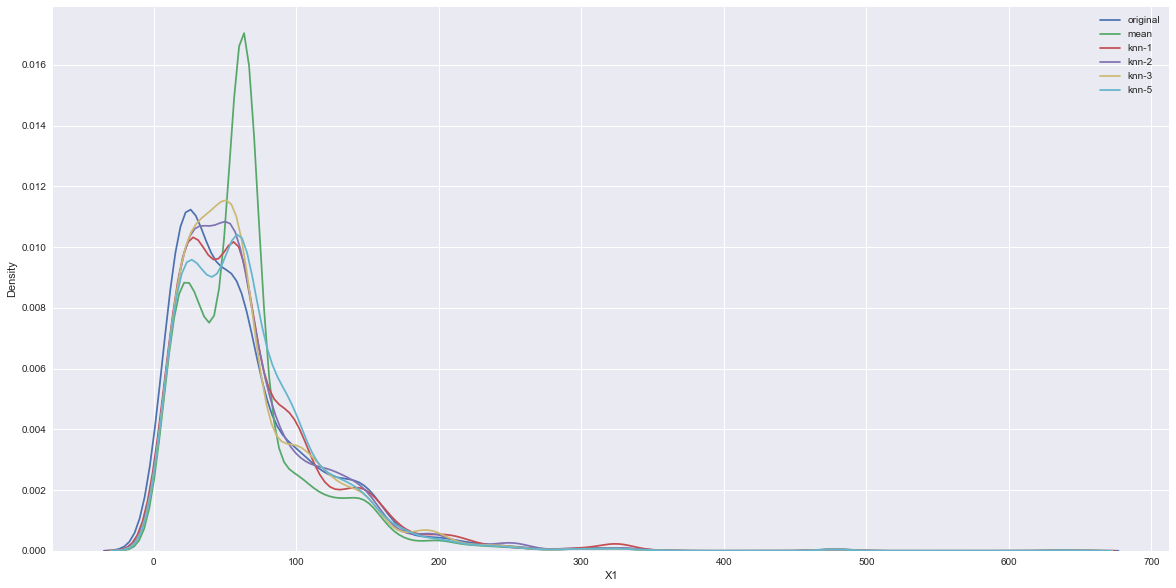

In [20]:
fig= plt.figure(figsize=(20,10))



sns.kdeplot(data=data, x="X1", label="original")
sns.kdeplot(data=simple_imputed, x="X1", label="mean")
sns.kdeplot(data=knn_imputed_1, x="X1", label="knn-1")
sns.kdeplot(data=knn_imputed_2, x="X1", label="knn-2")
sns.kdeplot(data=knn_imputed_3, x="X1", label="knn-3")
sns.kdeplot(data=knn_imputed_5, x="X1", label="knn-5")



#inputed with iterative imputer
#sns.histplot(ax=axes[6], data=iterative_imputed,  x="X1", bins=bins, kde=True)
#axes[6].set_title("Distribution avec imputation modèle iteratif")
plt.legend()
plt.show()

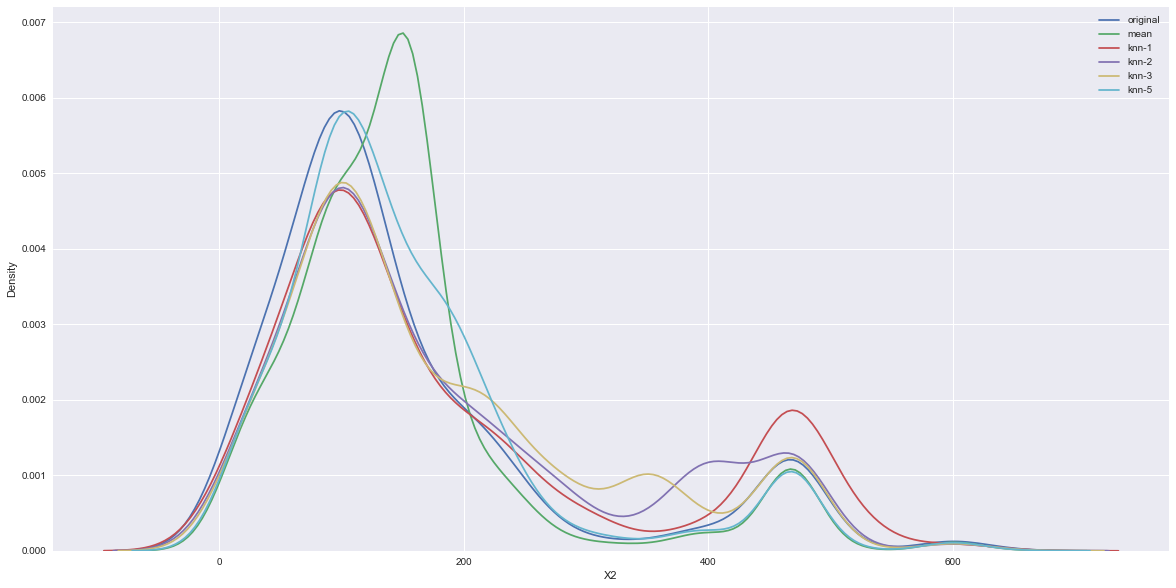

In [21]:
fig= plt.figure(figsize=(20,10))



sns.kdeplot(data=data, x="X2", label="original")
sns.kdeplot(data=simple_imputed, x="X2", label="mean")
sns.kdeplot(data=knn_imputed_1, x="X2", label="knn-1")
sns.kdeplot(data=knn_imputed_2, x="X2", label="knn-2")
sns.kdeplot(data=knn_imputed_3, x="X2", label="knn-3")
sns.kdeplot(data=knn_imputed_5, x="X2", label="knn-5")

#inputed with iterative imputer
#sns.histplot(ax=axes[6], data=iterative_imputed,  x="X1", bins=bins, kde=True)
#axes[6].set_title("Distribution avec imputation modèle iteratif")
plt.legend()
plt.show()

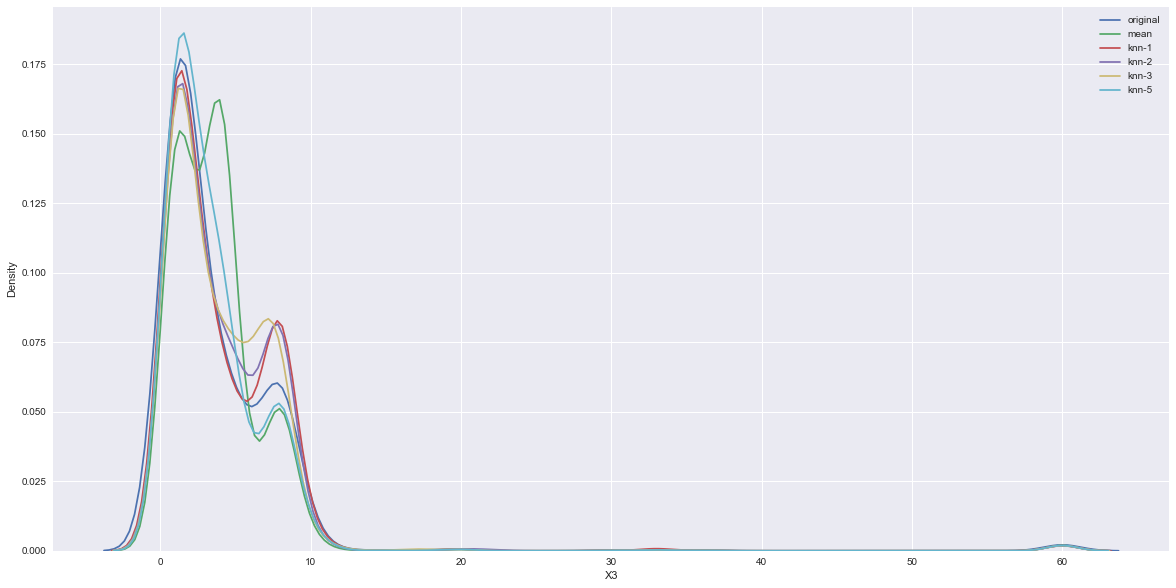

In [22]:
fig= plt.figure(figsize=(20,10))



sns.kdeplot(data=data, x="X3", label="original")
sns.kdeplot(data=simple_imputed, x="X3", label="mean")
sns.kdeplot(data=knn_imputed_1, x="X3", label="knn-1")
sns.kdeplot(data=knn_imputed_2, x="X3", label="knn-2")
sns.kdeplot(data=knn_imputed_3, x="X3", label="knn-3")
sns.kdeplot(data=knn_imputed_5, x="X3", label="knn-5")

#inputed with iterative imputer
#sns.histplot(ax=axes[6], data=iterative_imputed,  x="X1", bins=bins, kde=True)
#axes[6].set_title("Distribution avec imputation modèle iteratif")
plt.legend()
plt.show()

In [26]:
knn_imputed_1['outcome'] = data['outcome'] 
simple_imputed['outcome'] = data['outcome']
knn_imputed_1['outcome'] = data['outcome']
knn_imputed_2['outcome'] = data['outcome']
knn_imputed_3['outcome'] = data['outcome']
knn_imputed_5['outcome'] = data['outcome']

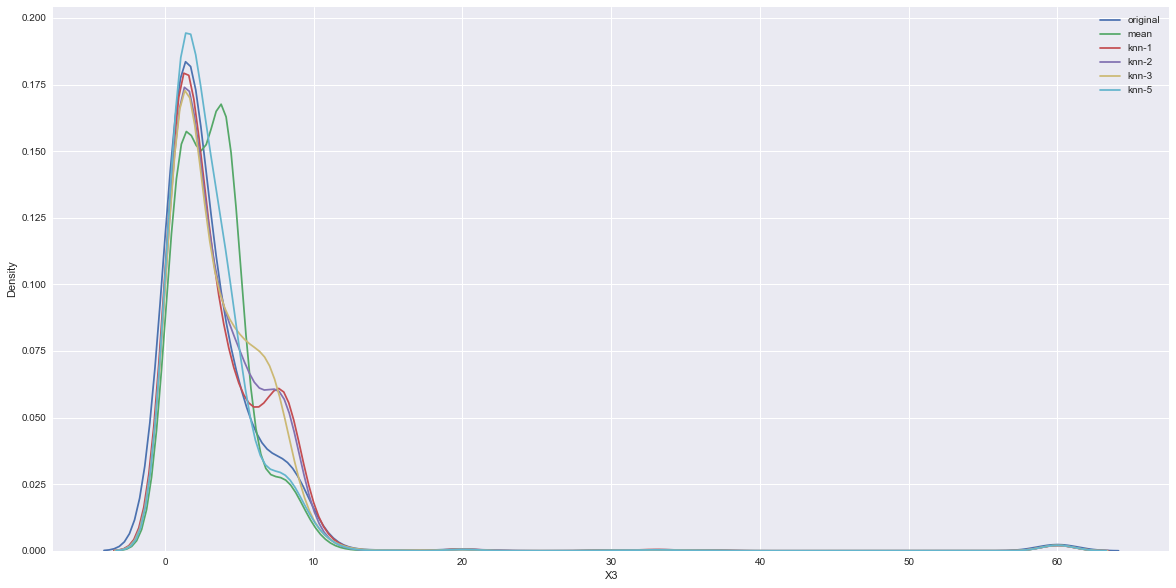

In [27]:
fig= plt.figure(figsize=(20,10))



sns.kdeplot(data=data[data['outcome']== 'nonad.'], x="X3", label="original")
sns.kdeplot(data=simple_imputed[simple_imputed['outcome']== 'nonad.'], x="X3", label="mean")
sns.kdeplot(data=knn_imputed_1[knn_imputed_1['outcome']== 'nonad.'], x="X3", label="knn-1")
sns.kdeplot(data=knn_imputed_2[knn_imputed_2['outcome']== 'nonad.'], x="X3", label="knn-2")
sns.kdeplot(data=knn_imputed_3[knn_imputed_3['outcome']== 'nonad.'], x="X3", label="knn-3")
sns.kdeplot(data=knn_imputed_5[knn_imputed_5['outcome']== 'nonad.'], x="X3", label="knn-5")

#inputed with iterative imputer
#sns.histplot(ax=axes[6], data=iterative_imputed,  x="X1", bins=bins, kde=True)
#axes[6].set_title("Distribution avec imputation modèle iteratif")
plt.legend()
plt.show()

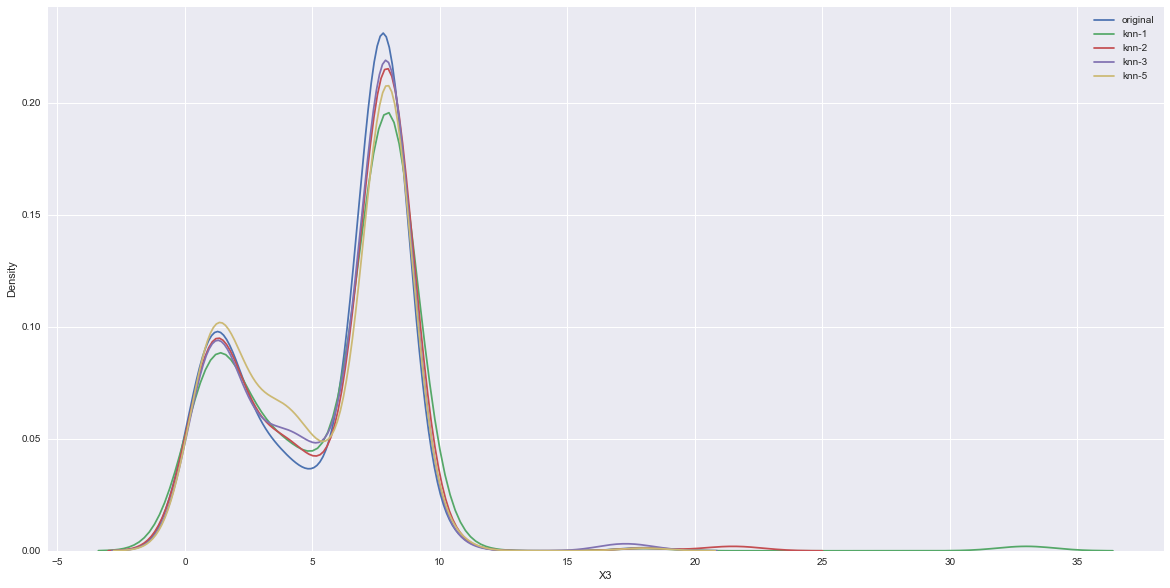

In [28]:
fig= plt.figure(figsize=(20,10))



sns.kdeplot(data=data[data['outcome']== 'ad.'], x="X3", label="original")
sns.kdeplot(data=simple_imputed[simple_imputed['outcome']== 'nad.'], x="X3", label="mean")
sns.kdeplot(data=knn_imputed_1[knn_imputed_1['outcome']== 'ad.'], x="X3", label="knn-1")
sns.kdeplot(data=knn_imputed_2[knn_imputed_2['outcome']== 'ad.'], x="X3", label="knn-2")
sns.kdeplot(data=knn_imputed_3[knn_imputed_3['outcome']== 'ad.'], x="X3", label="knn-3")
sns.kdeplot(data=knn_imputed_5[knn_imputed_5['outcome']== 'ad.'], x="X3", label="knn-5")

#inputed with iterative imputer
#sns.histplot(ax=axes[6], data=iterative_imputed,  x="X1", bins=bins, kde=True)
#axes[6].set_title("Distribution avec imputation modèle iteratif")
plt.legend()
plt.show()

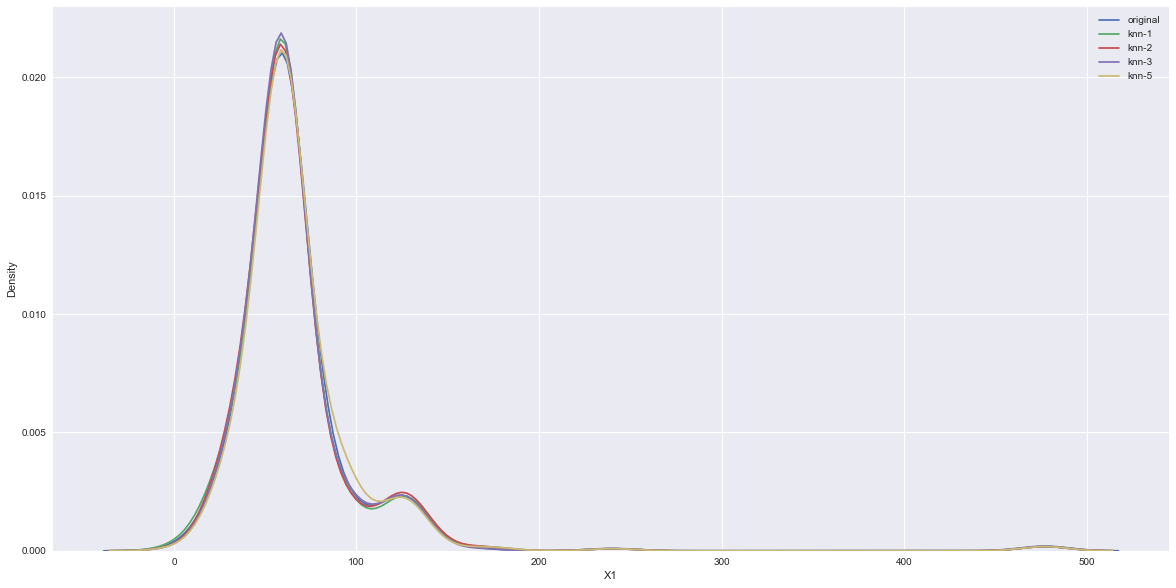

In [29]:
fig= plt.figure(figsize=(20,10))



sns.kdeplot(data=data[data['outcome']== 'ad.'], x="X1", label="original")
sns.kdeplot(data=simple_imputed[simple_imputed['outcome']== 'nad.'], x="X1", label="mean")
sns.kdeplot(data=knn_imputed_1[knn_imputed_1['outcome']== 'ad.'], x="X1", label="knn-1")
sns.kdeplot(data=knn_imputed_2[knn_imputed_2['outcome']== 'ad.'], x="X1", label="knn-2")
sns.kdeplot(data=knn_imputed_3[knn_imputed_3['outcome']== 'ad.'], x="X1", label="knn-3")
sns.kdeplot(data=knn_imputed_5[knn_imputed_5['outcome']== 'ad.'], x="X1", label="knn-5")

#inputed with iterative imputer
#sns.histplot(ax=axes[6], data=iterative_imputed,  x="X1", bins=bins, kde=True)
#axes[6].set_title("Distribution avec imputation modèle iteratif")
plt.legend()
plt.show()

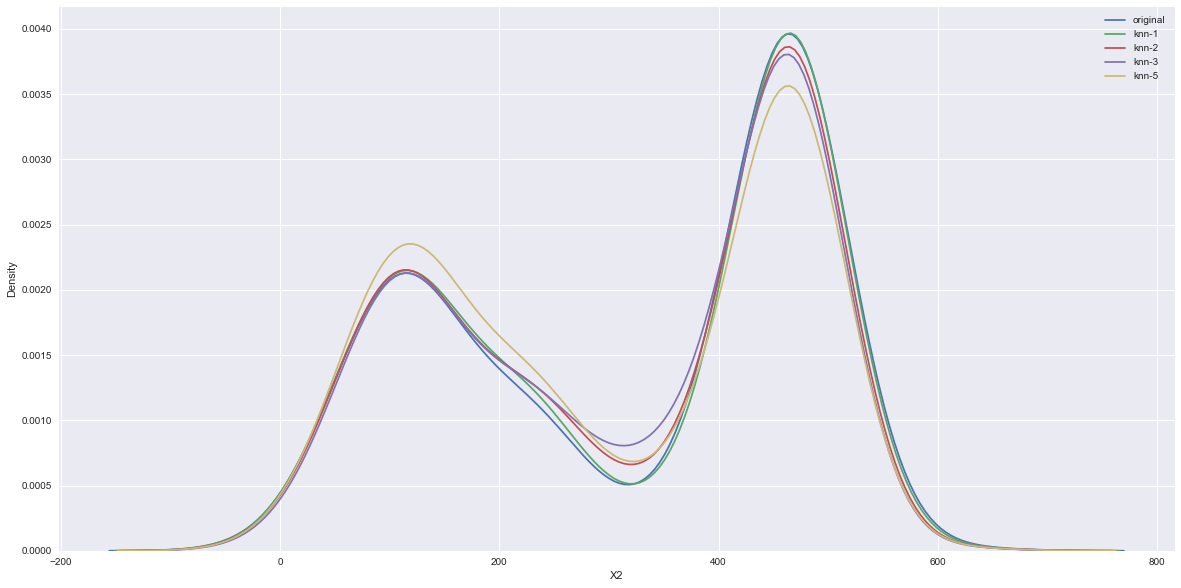

In [31]:
fig= plt.figure(figsize=(20,10))



sns.kdeplot(data=data[data['outcome']== 'ad.'], x="X2", label="original")
sns.kdeplot(data=simple_imputed[simple_imputed['outcome']== 'nad.'], x="X2", label="mean")
sns.kdeplot(data=knn_imputed_1[knn_imputed_1['outcome']== 'ad.'], x="X2", label="knn-1")
sns.kdeplot(data=knn_imputed_2[knn_imputed_2['outcome']== 'ad.'], x="X2", label="knn-2")
sns.kdeplot(data=knn_imputed_3[knn_imputed_3['outcome']== 'ad.'], x="X2", label="knn-3")
sns.kdeplot(data=knn_imputed_5[knn_imputed_5['outcome']== 'ad.'], x="X2", label="knn-5")

#inputed with iterative imputer
#sns.histplot(ax=axes[6], data=iterative_imputed,  x="X1", bins=bins, kde=True)
#axes[6].set_title("Distribution avec imputation modèle iteratif")
plt.legend()
plt.show()

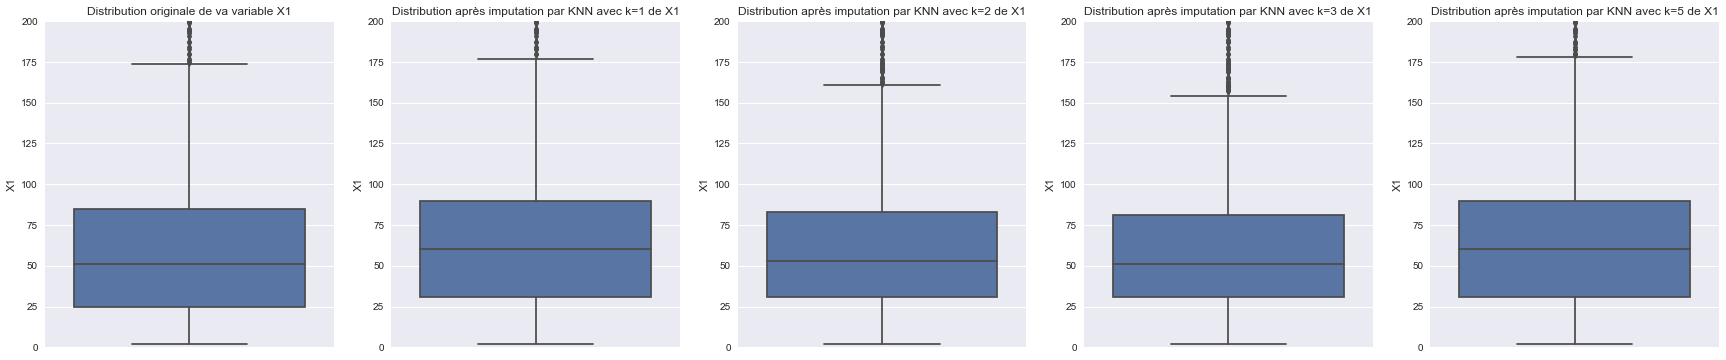

In [9]:
fig, axes = plt.subplots(ncols=, figsize=(30,6))

#original distribution
sns.boxplot(ax=axes[0], data=data, y="X1")
axes[0].set_ylim(0,200)
axes[0].set_title("Distribution originale de va variable X1")


#KNN with k=1 distribution
sns.boxplot(ax=axes[1], data=knn_imputed_1, y="X1")
axes[1].set_ylim(0,200)
axes[1].set_title("Distribution après imputation par KNN avec k=1 de X1")

#KNN with k=2 distribution
sns.boxplot(ax=axes[2], data=knn_imputed_2, y="X1")
axes[2].set_ylim(0,200)
axes[2].set_title("Distribution après imputation par KNN avec k=2 de X1")


#KNN with k=3 distribution
sns.boxplot(ax=axes[3], data=knn_imputed_3, y="X1")
axes[3].set_ylim(0,200)
axes[3].set_title("Distribution après imputation par KNN avec k=3 de X1")

#KNN with k=5 distribution
sns.boxplot(ax=axes[4], data=knn_imputed_5, y="X1")
axes[4].set_ylim(0,200)
axes[4].set_title("Distribution après imputation par KNN avec k=5 de X1")

#Iterative distribution
#sns.boxplot(ax=axes[5], data=knn_imputed_5, y="X1")
#axes[5].set_ylim(0,200)
#axes[5].set_title("Distribution après imputation iterative")

plt.show()

In [ ]:
fig, axes = plt.subplots(ncols=, figsize=(30,6))

#original distribution
sns.boxplot(ax=axes[0], data=data, y="X1")
axes[0].set_ylim(0,200)
axes[0].set_title("Distribution originale de va variable X1")


#KNN with k=1 distribution
sns.boxplot(ax=axes[1], data=knn_imputed_1, y="X1")
axes[1].set_ylim(0,200)
axes[1].set_title("Distribution après imputation par KNN avec k=1 de X1")

#KNN with k=2 distribution
sns.boxplot(ax=axes[2], data=knn_imputed_2, y="X1")
axes[2].set_ylim(0,200)
axes[2].set_title("Distribution après imputation par KNN avec k=2 de X1")


#KNN with k=3 distribution
sns.boxplot(ax=axes[3], data=knn_imputed_3, y="X1")
axes[3].set_ylim(0,200)
axes[3].set_title("Distribution après imputation par KNN avec k=3 de X1")

#KNN with k=5 distribution
sns.boxplot(ax=axes[4], data=knn_imputed_5, y="X1")
axes[4].set_ylim(0,200)
axes[4].set_title("Distribution après imputation par KNN avec k=5 de X1")

#Iterative distribution
#sns.boxplot(ax=axes[5], data=knn_imputed_5, y="X1")
#axes[5].set_ylim(0,200)
#axes[5].set_title("Distribution après imputation iterative")

plt.show()